# RANDOM FOREST CLASSIFICATION MODEL

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = fetch_openml(name = 'titanic', version = 1, as_frame = True)
df = data.frame

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:

X = df.select_dtypes(include='number').fillna(0)
y = df['survived'].astype(int)

In [8]:
X.head()

,pclass,age,sibsp,parch,fare,body
0,1,29.0000,0,0,211.3375,0.0
1,1,0.9167,1,2,151.5500,0.0
2,1,2.0000,1,2,151.5500,0.0
3,1,30.0000,1,2,151.5500,135.0
4,1,25.0000,1,2,151.5500,0.0


In [11]:
df.dtypes

pclass          int64
survived     category
name           object
sex          category
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body          float64
home.dest      object
dtype: object

In [13]:
df['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

In [9]:
# Visualize class balance

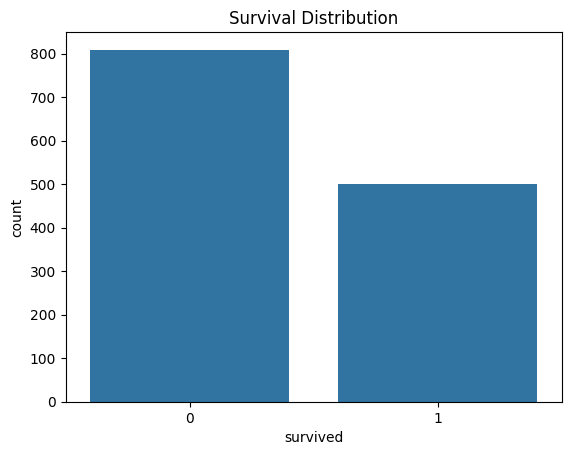

In [10]:
sns.countplot(x='survived', data = df)
plt.title('Survival Distribution')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42
                                        )

In [19]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = rf.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6984732824427481

In [23]:
del confusion_matrix

In [25]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[120,  24],
       [ 55,  63]], dtype=int64)

In [28]:
del classification_report

In [31]:

print('Classification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.75       144
           1       0.72      0.53      0.61       118

    accuracy                           0.70       262
   macro avg       0.70      0.68      0.68       262
weighted avg       0.70      0.70      0.69       262



# FEATURE IMPORTANCE VISUALIZATION

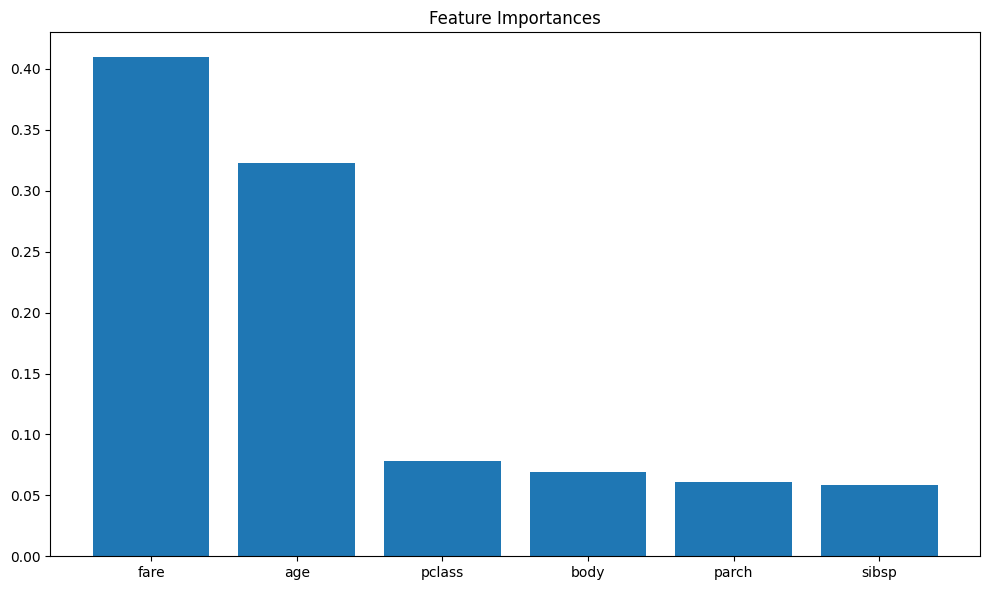

In [37]:
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
features = X.columns
plt.figure(figsize = (10,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X.shape[1]), features[indices], rotation = 0)
plt.tight_layout()
plt.show()